# IMPORTS

In [1]:
%run ipynb_setup.ipynb

In [2]:
%run class_TokenSearch.ipynb

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# IMPLEMENT TEXT SEARCH

In [3]:
d=Dataset()

In [4]:
d.raw.head(1).transpose()

,0
title,2020 Summer Vintage Flamingo Print Pajamas Set Casual Loose T Shirt Top And Elastic Shorts Women Sleepwear Night Wear Loungewear Sets
title_orig,2020 Summer Vintage Flamingo Print Pajamas Set Casual Loose T Shirt Top And Elastic Shorts Women Sleepwear Night Wear Loungewear Sets
price,16.0
retail_price,14
currency_buyer,EUR
units_sold,100
uses_ad_boosts,0
rating,3.76
rating_count,54
rating_five_count,26.0


### build up regex

In [6]:
d.df['title'].str.lower().str.contains('summer|hot')

0        True
1        True
2       False
3        True
4       False
        ...  
1565    False
1567    False
1568    False
1570     True
1572    False
Name: title, Length: 1341, dtype: bool

In [7]:
d.df['title'].str.contains('womens|me|dress|banana',flags=re.IGNORECASE,regex=True)

0       True
1       True
2       True
3       True
4       True
        ... 
1565    True
1567    True
1568    True
1570    True
1572    True
Name: title, Length: 1341, dtype: bool

In [8]:
pd.concat(
    [
        d.df['title'],
        d.df['title'].str.contains('sans',flags=re.IGNORECASE,regex=True)+0
    ],
    axis=1,
)[:20]

,title,title
0,2020 Summer Vintage Flamingo Print Pajamas Set Casual Loose T Shirt Top And Elastic Shorts Women Sleepwear Night Wear Loungewear Sets,0
1,SSHOUSE Summer Casual Sleeveless Soirée Party Soirée sans manches Vêtements de plage sexy Mini robe femme wshC1612242400387A21,1
2,2020 Nouvelle Arrivée Femmes Printemps et Été Plage Porter Longue Mince Cardigan Ouvert Avant Kimono Vert Feuille Imprimé En Mousseline de Soie Cardigan S-5XL,0
3,Hot Summer Cool T-shirt pour les femmes Mode Tops Abeille Lettres imprimées Manches courtes O Neck Coton T-shirts Tops Tee Vêtements,0
4,"Femmes Shorts d'été à lacets taille élastique lâche mince pantalon décontracté, plus la taille S-8XL",0
5,Plus la taille d'été femmes décontracté sans manches barboteuses combinaisons combinaison de couleur unie jarretelles pantalons lâche salopette,1
6,Women Fashion Loose Lace Blouse Blouse V Neck Bat Sleeves T Shirt Hollow Out Tops Plus Grande Taille XS-8XL,0
7,Robe tunique ample femme Robe d'été Robe en jean Robe chemise en jean Robe droite,0
8,Robe d'été décontractée à manches courtes pour femmes,0
9,"Femmes d'été, plus la taille décontractée lâche col en V à manches courtes imprimé floral Blouse Tops",0


### combine description / tag columns to do single regex on

In [9]:
d.df[['title','title_orig','tags']].apply(lambda x:x['title']+x['title_orig']+x['tags'],axis=1)

0       2020 Summer Vintage Flamingo Print  Pajamas Set Casual Loose T Shirt Top And Elastic Shorts Women Sleepwear Night Wear Loungewear Sets2020 Summer Vintage Flamingo Print  Pajamas Set Casual Loose T Shirt Top And Elastic Shorts Women Sleepwear Night Wear Loungewear SetsSummer,Fashion,womenunderwearsuit,printedpajamasset,womencasualshort,Women's Fashion,flamingo,loungewearset,Casual,Shirt,casualsleepwear,Shorts,flamingotshirt,Elastic,Vintage,Tops,tshirtandshortsset,Women,Sleepwear,Print,womenpajamasset,womennightwear,Pajamas,womensleepwearset
1                                                                                                                                                                                                                                 SSHOUSE Summer Casual Sleeveless Soirée Party Soirée sans manches Vêtements de plage sexy Mini robe femme wshC1612242400387A21Women's Casual Summer Sleeveless Sexy Mini DressMini,womens dresses,Summer,Patchwork,fashion d

# FUNCTIONS TO BUILD UP QUERY

results: 372 items found, I can do better if you can be more specific


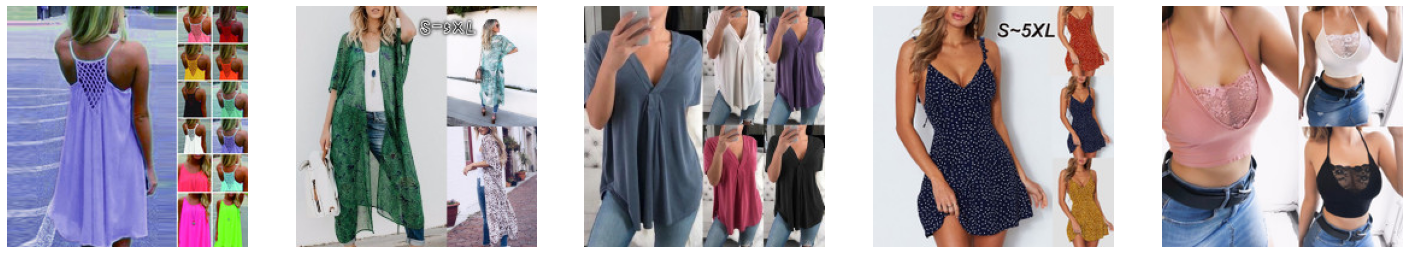

,discounted(tokens matched),discounted(exy),tokens matched,exy,product_descriptor
1,0.722595,0.722595,1,True,SSHOUSE Summer Casual Sleeveless Soirée Party Soirée sans manches Vêtements de plage sexy Mini robe femme wshC1612242400387A21 Women s Casual Summer Sleeveless Sexy Mini Dress Mini womens dresses Summer Patchwork fashion dress Dress Mini dress Women s Fashion Women S Clothing backless party summer dresses sleeveless sexy Casual green
2,0.722595,0.722595,1,True,2020 Nouvelle Arrivée Femmes Printemps et Été Plage Porter Longue Mince Cardigan Ouvert Avant Kimono Vert Feuille Imprimé En Mousseline de Soie Cardigan S 5XL 2020 New Arrival Women Spring and Summer Beach Wear Long Thin Cardigan Open Front Kimono Green Leaf Printed Chiffon Cardigan S 5XL Summer cardigan women beachwear chiffon Sexy women Coat summercardigan openfront short sleeves Swimsuit Women s Fashion leaf Green printed Spring longcardigan Women Beach kimono leopardprint
11,0.722595,0.722595,1,True,Été Sexy Femmes Mode Casual Lâche Tops Casual T Shirt D été Col En V Solide Couleur Plus La Taille À Manches Courtes Blouse Summer Sexy Women Fashion Casual Loose Tops Casual T Shirt Summer V Neck Solid Color Plus Size Short Sleeve Blouse Summer Plus Size Cotton T Shirt womens shirt summer t shirts short sleeves V neck T Shirts Fashion sexy Casual Women blouse Shorts Sleeve Pure Color Women s Fashion Pullovers Tops lightblue
16,0.722595,0.722595,1,True,Nouvelle mode d été pour femmes Robe sans manches à pois à pois et encolure en V Mini robe à bretelles sans dos Robe de soirée sans dos Robes décontractées Top Robes décontractées New Summer Women s Fashion Sleeveless Polka Dot V neck Dress Strap Mini Backless Party Dress Casual Top Dresses Summer fashion women Fashion Mini Dresses Tops Polkas V neck Mini dress Women s Fashion Party Dress backless party Sexy Dress Dress sleeveless polka dot Casual casual dress red
17,0.722595,0.722595,1,True,2018 New Fashion Women s Tops Sexy Strappy Sleeveless Dentelle sans manches Crop Cops 2018 New Fashion Women s Tops Sexy Strappy Sleeveless Lace Crop Tops blouse Plus Size Lace lace top Tops Fashion strappy sexy sleeveless summer tops Women Fashion white
18,0.722595,0.722595,1,True,Débardeur d été 5 Couleurs Grandes Tailles été Femme Mode Femme Débardeur décontracté sans manches Débardeur été Sexy Découpe dos ouvert double épaisseur S 5XL 5 Color Plus Size Summer New Women Fashion Ladies Casual Sleeveless Tops Summer Sexy Cutout Back Open Double Layer Tank Top S 5XL Summer Fashion tunic Women Vest Tank Tops topsamptshirt tank top doublelayer Women s Fashion backless sexy Ladies sleeveless Casual Women blue
20,0.722595,0.722595,1,True,Top Maillot de bain Ensembles Mode Maillots de bain Femme Bikini 2016 Sexy rembourré Top Swimsuit Sets Fashion Swimwear Women Bikini 2016 Sexy Padded Fashion Floral print Tops sexy bikini Swimwear Swimsuit padded Bikini sexy Women Women s Fashion Swimming green
21,0.722595,0.722595,1,True,Gilet d été pour femmes Gilet de mode couleur unie pour femmes T shirt sans manches en coton T shirt à lacets Hollow Sexy Slim T shirt débardeur à débardeur Summer Women Fashion Vest Solid Color Women Sleeveless Cotton T shirt Lace Up Hollow Sexy Slim Tank Tops Tee Summer Vest Fashion Tank Lace Tops slim Women s Fashion tank top T Shirts Lace Up topsamptee sexy sleeveless Women Women Fashion Cotton black
22,0.722595,0.722595,1,True,Conception de rosée Femmes Mode D été Sexy Col En V Gilet Bouton Bretelle Spaghetti Débardeur Coton Sans Manches Débardeur Couleur Unie Camisole Casual Lâche Tops Vacances Plage Porter Plus La Taille S 5XL 5 Couleurs Dew Design Women Summer Fashion Sexy V Neck Vest Button Spaghetti Strap Tank Top Cotton Sleeveless Tank Top Solid Color Camisole Casual Loose Tops Holiday Beach Wear Plus Size S 5XL 5 Colors Women Vest Vest Fashion buttontop camisole Summer Spaghetti Strap tank top Women s Fashion Plus Size Design V neck sleeveless sexy Spaghetti summer tops Cotton Tank Tops Casual Cotton Ves

In [10]:
ts=TokenSearch(dataset=Dataset())
#ts.tokens_found_count(search_tokens=['summer','short'],verbose=1) # basic logic
#ts.tokens_found_count(search_tokens=['harajuku','goth','sexy'],verbose=1) # test rare token logic
#ts.tokens_found_count(search_tokens=['kids','top','banana','bobby','henry'],verbose=0) # test bad search tokens
#ts.tokens_found_count(search_tokens=['kids','sandals'],verbose=1) # test
#ts.tokens_found_count(search_tokens=['balloon'],show_top_n=5,verbose=1) # test show_top_n
#ts.tokens_found_count(search_tokens=['balloon'],show_top_n=5,verbose=1) # test results snipping
#ts.tokens_found_count(search_tokens=['banana'],show_top_n=5,verbose=1) # test results chat#
#ts.tokens_found_count(search_tokens=['sandal'],show_top_n=5,verbose=1) # test results chat
#ts.tokens_found_count(search_tokens=['sandal','red'],show_top_n=5,verbose=1) # test results chat
#ts.tokens_found_count(search_string='sandal red',show_top_n=5,verbose=1) # test results chat
#ts.tokens_found_count(search_tokens=['top','skinny','red'],show_top_n=5,verbose=1) # test results chat
#ts.tokens_found_count(search_tokens=['top','skinny','red'],show_top_n=5,exact_search=True,verbose=1) # test results chat
#ts.tokens_found_count(search_string='top red',show_top_n=5,verbose=1) # test results chat
#ts.tokens_found_count(search_string='top red',show_top_n=5,exact_search=True,verbose=1) # test exact search
ts.tokens_found_count(search_string='exy',show_top_n=5,verbose=1) # test exact search
#ts.tokens_found_count(search_string='exy',show_top_n=5,exact_search=True,verbose=1) # test exact search
#ts.tokens_found_count(search_string='top red',show_top_n=5,exact_search=True,verbose=1) # test exact search

### simple way to get description + tags to regex over

In [13]:
d.df[['title','title_orig','tags','product_color']]

,title,title_orig,tags,product_color
0,2020 Summer Vintage Flamingo Print Pajamas Set Casual Loose T Shirt Top And Elastic Shorts Women Sleepwear Night Wear Loungewear Sets,2020 Summer Vintage Flamingo Print Pajamas Set Casual Loose T Shirt Top And Elastic Shorts Women Sleepwear Night Wear Loungewear Sets,"Summer,Fashion,womenunderwearsuit,printedpajamasset,womencasualshort,Women's Fashion,flamingo,loungewearset,Casual,Shirt,casualsleepwear,Shorts,flamingotshirt,Elastic,Vintage,Tops,tshirtandshortsset,Women,Sleepwear,Print,womenpajamasset,womennightwear,Pajamas,womensleepwearset",white
1,SSHOUSE Summer Casual Sleeveless Soirée Party Soirée sans manches Vêtements de plage sexy Mini robe femme wshC1612242400387A21,Women's Casual Summer Sleeveless Sexy Mini Dress,"Mini,womens dresses,Summer,Patchwork,fashion dress,Dress,Mini dress,Women's Fashion,Women S Clothing,backless,party,summer dresses,sleeveless,sexy,Casual",green
2,2020 Nouvelle Arrivée Femmes Printemps et Été Plage Porter Longue Mince Cardigan Ouvert Avant Kimono Vert Feuille Imprimé En Mousseline de Soie Cardigan S-5XL,2020 New Arrival Women Spring and Summer Beach Wear Long Thin Cardigan Open Front Kimono Green Leaf Printed Chiffon Cardigan S-5XL,"Summer,cardigan,women beachwear,chiffon,Sexy women,Coat,summercardigan,openfront,short sleeves,Swimsuit,Women's Fashion,leaf,Green,printed,Spring,longcardigan,Women,Beach,kimono",leopardprint
3,Hot Summer Cool T-shirt pour les femmes Mode Tops Abeille Lettres imprimées Manches courtes O Neck Coton T-shirts Tops Tee Vêtements,Hot Summer Cool T Shirt for Women Fashion Tops Bee Printed Letters Short Sleeve O Neck Cotton T-shirts Tops Tee Clothing,"Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,printedletterstop,Clothing,Tops,Necks,short sleeves,Women's Fashion,Women Clothing,printed,Women,tshirtforwomen,Fashion,T Shirts,Shirt",black
4,"Femmes Shorts d'été à lacets taille élastique lâche mince pantalon décontracté, plus la taille S-8XL",Women Summer Shorts Lace Up Elastic Waistband Loose Thin Casual Pants Plus Size S-8XL,"Summer,Plus Size,Lace,Casual pants,Bottom,pants,Loose,Women's Fashion,Shorts,Lace Up,Elastic,Casual,Women",yellow
...,...,...,...,...
1565,Nouveau Pantalon De Mode D'été Femmes Leggings Pantalon Déchiré Pantalon Mince Armée Vert Collants Pantalon,New Summer Fashion Trousers Women Leggings Ripped Pants Slim Pants Army Green Tights Pants,"Summer,Leggings,Fashion,high waist,pants,slim,Women's Fashion,trousers,Green,Army,Women",skyblue
1567,Combinaison sans manches pour femmes couleur unie Dames Slim Short Bodycon Rompers Femmes Body,Sleeveless Solid Color Women Jumpsuit Ladies Slim Short Bodycon Rompers Women Bodysuit,"bodycon jumpsuits,nightwear,Shorts,slim,Body Suit,shortjumpsuit,Women,vestido,Ladies,sleeveless,sexy,Rompers,Casual,jumpsuit",black
1568,Nouvelle Mode Femmes Bohême Pissenlit Imprimer Tee Shirt Lady Fille T-shirt À Manches Courtes Boho Graphique Tee Casual Yoga Top Plus La Taille,New Fashion Women Bohemia Dandelion Print Tee Shirt Lady Girl Short Sleeve T-shirt Boho Graphic Tee Casual Yoga Top Plus Size,"bohemia,Plus Size,dandelionfloralprinted,short sleeves,yoga top,bohotshirt,Cool T-Shirts,Women's Fashion,Fashion,short sleeve shirt,Casual,Women,Shorts,Yoga,Shirt,Sleeve,graphic tee,Tee Shirt,T Shirts,boho,bohoshirt,Print,Casual Tops,Tops",navyblue
1570,Nouveautés Hommes Siwmwear Beach-Shorts Hommes Summer Short de bain court à séchage rapide Beach-Wear Sports,New Men Siwmwear Beach-Shorts Men Summer Quick-Dry Short Swim-Shorts Beach-Wear Sports,"runningshort,Beach Shorts,beachpant,menbeachshort,Men,sailboatshort,beach swimwear,Men's Fashion,Shorts,Summer,men's shorts,Sport",white
